In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False   # 마이너스 부호 깨짐

## 2.3.3 선형모델
- linear model
- 입력 특성에 대한 선형 함수를 만들어 예측 수행

w[0]: 0.393906  b: -0.031804


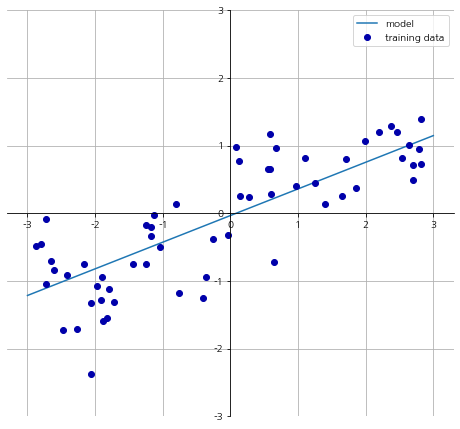

In [4]:
mglearn.plots.plot_linear_regression_wave()

### 선형 회귀(최소제곱법)

- 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차(Mean Squared Error)를 최소화하는 파라미터 w와 b를 찾음.

In [5]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [6]:
# scikit-learn은 훈련 데이터에서 유도된 속성은 항상 끝에 밑줄 붙임
print('lr.coef_:',lr.coef_)
print('lr.intercept_:',lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [7]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train,y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test,y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [8]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=0)

lr = LinearRegression().fit(X_train,y_train)

In [9]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train,y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test,y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


- 훈련 세트에 overfitting돼 테스트 세트의 R^2가 낮음

### Ridge 회귀

- 가중치w의 절댓값을 가능한 작게 만듦
- 과대적합을 제한(L2 규제)
- pramaeter로 alpha값 존재
  - 훈련 세트의 성능 대비 모델을 얼마나 단순화할지 결정
  - alpha값 높일수록 w가 0에 더 가까워짐
  - 훈련 세트 성능은 나빠지나 일반화에는 도움

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge.score(X_train,y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge.score(X_test,y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [11]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge10.score(X_train,y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge10.score(X_test,y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [12]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge01.score(X_train,y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge01.score(X_test,y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


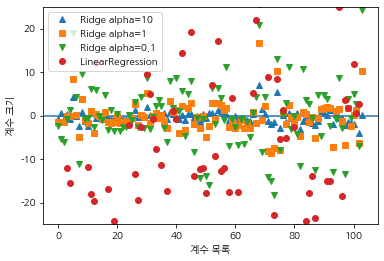

In [13]:
plt.plot(ridge10.coef_,'^',label = 'Ridge alpha=10')
plt.plot(ridge.coef_,'s',label = 'Ridge alpha=1')
plt.plot(ridge01.coef_,'v',label = 'Ridge alpha=0.1')

plt.plot(lr.coef_,'o',label = 'LinearRegression')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()
plt.show()

- alpha값이 높을수록 coef_의 절댓값 크기 작음

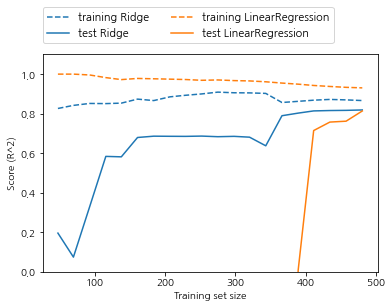

In [14]:
mglearn.plots.plot_ridge_n_samples()

## Lasso

- 계수w를 0으로 만듦(L1 규제)
- 특성 선택이 자동으로 이뤄짐

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso.score(X_train,y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso.score(X_test,y_test)))
print('사용한 특성의 개수:', np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [16]:
# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train,y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso001.score(X_train,y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso001.score(X_test,y_test)))
print('사용한 특성의 개수:', np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


- alpha값 낮추면 모델 복잡도 증가
- 성능은 ridge보다 조금 낫지만 모델분석은 용이
- alpha값 너무 낮추면 규제 효과 없어져 과대적합

In [17]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train,y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso00001.score(X_train,y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso00001.score(X_test,y_test)))
print('사용한 특성의 개수:', np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


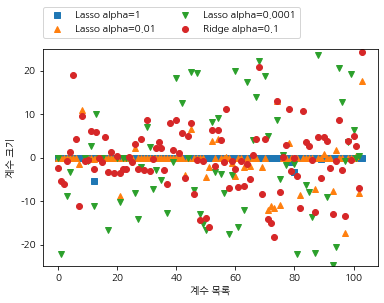

In [18]:
plt.plot(lasso.coef_,'s',label='Lasso alpha=1')
plt.plot(lasso001.coef_,'^',label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_,'v',label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1')

plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

plt.show()

- alpha=1일 때 계수 대부분 0, 나머지 계수 크기도 작음
- alpha=0.0001일 때 계수 대부분이 0이 아님, 계수 크기도 커짐
- Ridge 모델은 계수가 0이 되지 않음
- 보통 Ridge 선호
- 특성 많고 일부분만 사용하고자 한다면 Lasso가 적합
- scikit-learn에서는 둘을 결합한 ElasticNet 제공

### 분류용 선형 모델

- 선, 평면, 초평면을 사용해 두 개 클래스를 구분하는 분류기
- Logistic Regression
- Support Vector Classifier

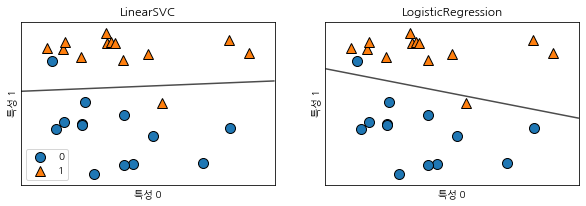

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,
                                    ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()
plt.show()

- 두 모델 모두 기본적으로 L2 규제 사용
- parameter : C
  - C값이 클수록 규제 감소 (훈련세트에 가능한 fit)
  - C값이 작을수록 규제 강화 (계수 벡터w가 0에 가까워짐)

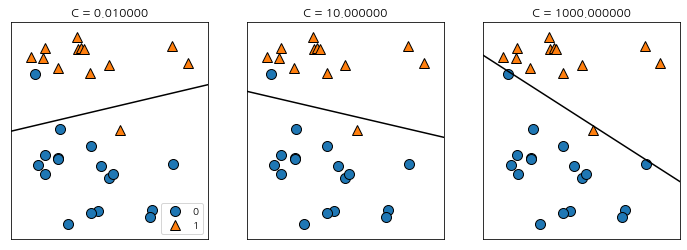

In [20]:
mglearn.plots.plot_linear_svc_regularization()

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg=LogisticRegression(max_iter=5000).fit(X_train,y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg.score(X_train,y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg.score(X_test,y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


- 훈련 세트와 테스트 세트 성능 매우 비슷해 과소적합
- 모델 제약 풀기위해 C 증가 필요

In [22]:
logreg100=LogisticRegression(C=100,max_iter=5000).fit(X_train,y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg100.score(X_train,y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg100.score(X_test,y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [23]:
logreg001=LogisticRegression(C=0.01,max_iter=5000).fit(X_train,y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg001.score(X_train,y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg001.score(X_test,y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


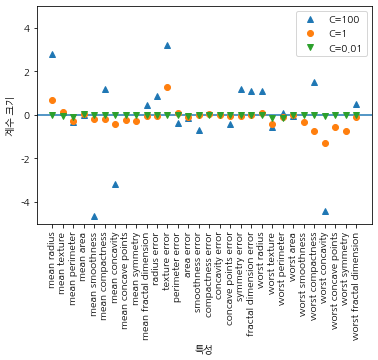

In [24]:
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg001.coef_.T,'v',label='C=0.01')

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()
plt.show()

- LogisticRegression은 기본적으로 L2 규제 적용
- 규제를 강화할수록 계수는 0에 가까워짐

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


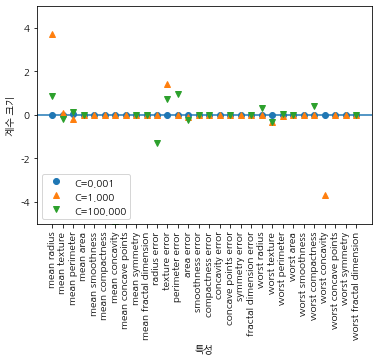

In [25]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear',C=C,penalty='l1',max_iter=1000).fit(X_train,y_train)
    print('C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}'.format(
        C,lr_l1.score(X_train,y_train)))
    print('C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}'.format(
        C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel('특성')
plt.ylabel('계수 크기')

plt.ylim(-5,5)
plt.legend(loc=3)
plt.show()

### 다중 클래스 분류용 선형 모델

- 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습
- 클래스의 수만큼 이진 분류 모델이 생성됨
- 예측시, 모든 모델이 작동해, 가장 높은 점수를 내는 분류기 클래스를 예측값으로 선택

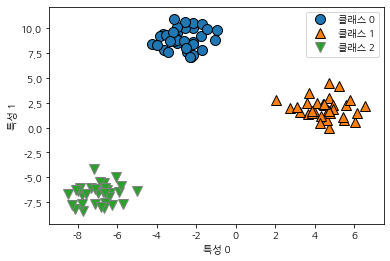

In [26]:
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

plt.legend(['클래스 0','클래스 1','클래스 2'])
plt.show()

In [27]:
linear_svm = LinearSVC().fit(X,y)
print('계수 배열의 크기: ',linear_svm.coef_.shape)
print('절편 배열의 크기: ',linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


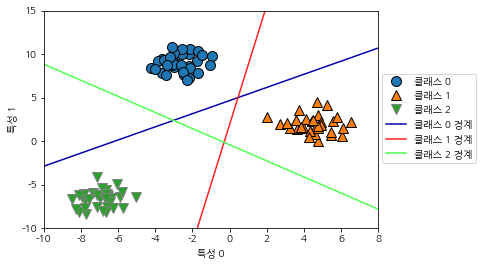

In [28]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)

plt.xlim(-10,8)
plt.ylim(-10,15)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.show()

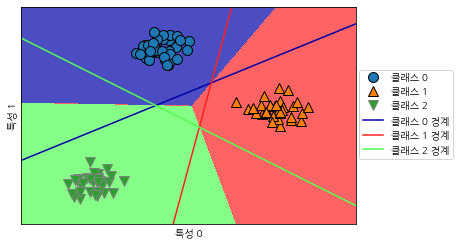

In [29]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,
                               mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
    
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

### 장단점과 매개변수

- alpha값 클수록, C값 작을수록 단순한 모델
  - alpha: LinearRegression 주요 매개변수
  - C: LinearSVC, LogisticRegression 주요 매개변수
- L1: 중요한 특성 많지 않은 경우, 해석이 중요한 경우
- L2: 기본
- 대용량 데이터셋의 경우 LogisticRegression과 Ridge에 solver='sag' 옵션 사용
- SGDClassifier, SGDRegressor 사용 가능
- 선형 모델: 샘플에 비해 특성이 많을 때 잘 작동, 저차원의 경우 다른 모델의 일반화 성능이 더 우수